# Crime Analytics Visualisation

In [114]:
using DataFrames
using PyPlot
using Gadfly

INFO: Precompiling module Gadfly.


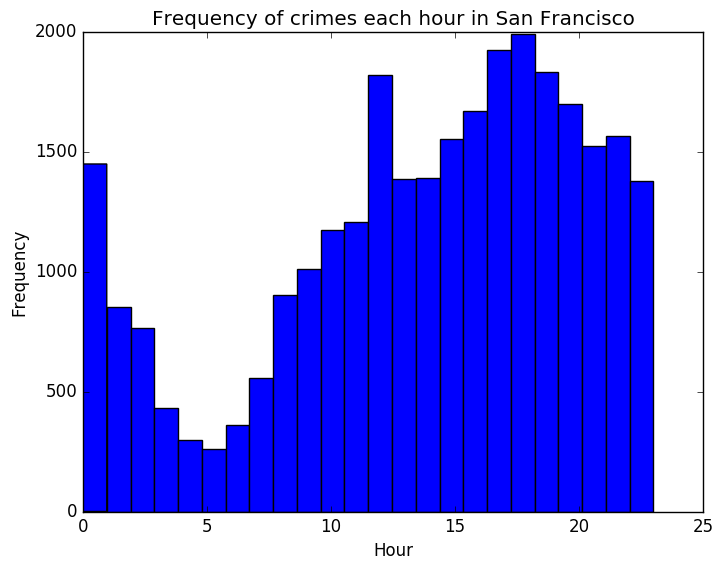

In [16]:
function sf_time()
	sf = DataFrames.readtable("sanfrancisco_incidents_summer_2014.csv")
	times = sf[:Time]
    # Format time into ints for plotting
    function hour(x::String)
        if x[4:5] > "30"
            round = Int8(1)
        else
        	round = Int8(0)
    	end
        return (parse(Int8, x[1:2]) + round) % 24
    end
    sf[:Hour] = map(hour, times)
    PyPlot.plt[:hist](sf[:Hour], bins=24)
    PyPlot.title("Frequency of crimes each hour in San Francisco")
    PyPlot.xlabel("Hour")
    PyPlot.ylabel("Frequency")
end

sf_time();

From this chart, we can see that, unsurprisingly, crime rates are very low in the early hours of the morning, with a minimum around 5am. Crime rates tend to increase later on in the day, peaking at around 6pm.

There is a peak at 12pm which doesn't seem to fit in with the rest of the data. I am not sure if this is an outlier or if it is actually the case that more crimes happen at lunchtime.

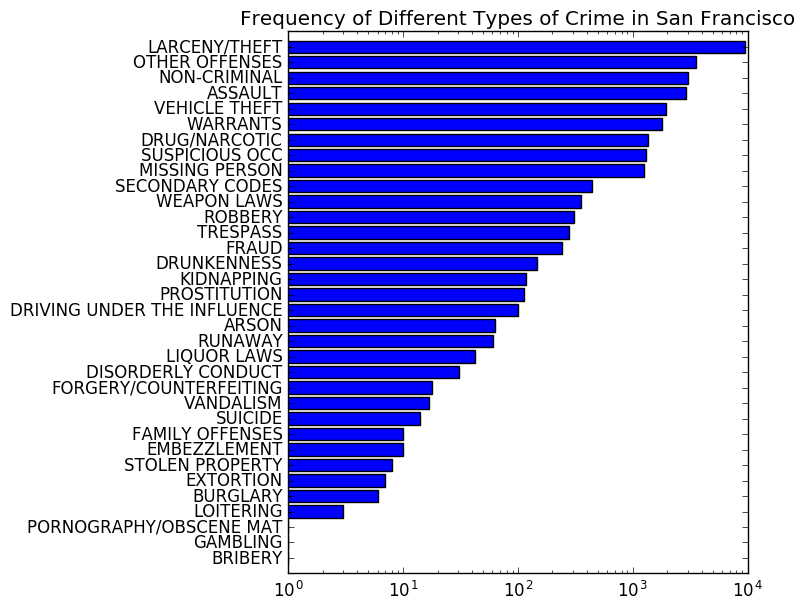

In [92]:
function sf_incidents()
	sf = DataFrames.readtable("sanfrancisco_incidents_summer_2014.csv")
	# Group number of crimes by incidences
    grouped = by(sf, :Category, nrow)
    sort!(grouped, cols = [order(:x1)])
    PyPlot.plt[:barh](1:size(grouped)[1], grouped[:x1],
        align = "center")
    PyPlot.plt[:yticks](1:size(grouped)[1], grouped[:Category])
    PyPlot.plt[:tight_layout]()
    PyPlot.plt[:xscale]("log")
    PyPlot.plt[:title](
        "Frequency of Different Types of Crime in San Francisco")
end

sf_incidents();

This chart shows how often different types of crimes occur. It was necessary to use a log scale on the x axis to see all the data easily. As you can see, theft is the most common crime by a long way during Summer 2014 in SF, followed by 'other offenses'. This category is likely to be murder, as it does not appear elsewhere in the classifications. Perhaps they did not want to obviously publish murder statistics? Or this category is related to Police shootings?

There is a huge variation in frequency of different crimes, and there was only one occurence of bribery, gambling or obscene material in this timeframe.

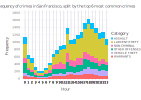

In [147]:
function sf_frequency()
    sf = DataFrames.readtable("sanfrancisco_incidents_summer_2014.csv")
	times = sf[:Time]
    # Format time into ints for plotting
    function hour(x::String)
        if x[4:5] > "30"
            round = Int8(1)
        else
        	round = Int8(0)
    	end
        return (parse(Int8, x[1:2]) + round) % 24
    end
    sf[:Hour] = map(hour, times)
    # Group by times when crime was committed
    grouped = by(sf, [:Hour, :Category], nrow)
    # Get the top 6 most common crimes
    # Group number of crimes by incidences
    categories = by(sf, :Category, nrow)
    top = sort(categories, cols = [order(:x1)])
    top = tail(top)
    function intop(x::String)
        for i in top[:Category]
            if x == i
                return x
            else
                continue
            end
        end
        return false
    end
    grouped[:Category] = map(intop, grouped[:Category])
    grouped = grouped[grouped[:Category] .!= false, :]
    Gadfly.plot(grouped, x="Hour", y="x1", color="Category",
    	Geom.bar(position=:stack), Guide.xticks(ticks=grouped[:Hour]),
    	Guide.yticks(ticks=[0:200:1800;]), Guide.title(
        "Frequency of crimes in San Francisco, split by the top 6 most common crimes"),
    	Guide.ylabel("Frequency"))
end

sf_frequency()

This plot is similar to the first plot we saw, but now includes more detail, as we can see the frequency distribution of individual categories of crimes at different times. Only the 6 categoeries with the highest crime rates were included, because otherwise the graph was too cluttered.

It seems that there are no obvious differences between the different categories, and on the whole the proportion of each stays roughly constant. The only distinguishable feature here is that vehicle thefts don't seem to peak around 12pm, when other crimes show an obvious peak. It is not obvious why this would be the case